In [10]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay)

In [11]:
final_merged_df = pd.read_csv('project_checkin_data.csv')
final_merged_df

,Date,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume,TSLA_Return,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,GSPC_Adj Close,GSPC_Volume,GSPC_Return,change_in_followers,TSLA_Positive_Return
0,2020-05-13,54.722000,55.066666,50.886665,52.730667,52.730667,285982500,-3.638999,2865.86,2874.14,2793.15,2820.00,2820.00,6151650000,-1.600218,174066.0,0
1,2020-05-19,54.344666,54.804668,53.738667,53.867332,53.867332,144547500,-0.878344,2948.59,2964.21,2922.35,2922.94,2922.94,4984330000,-0.869907,87362.0,0
2,2020-05-26,55.633331,55.639999,54.380669,54.591331,54.591331,121345500,-1.872978,3004.08,3021.72,2988.17,2991.77,2991.77,5848500000,-0.409776,68096.0,0
3,2020-05-28,54.234001,54.983334,53.445999,53.720669,53.720669,108834000,-0.946514,3046.61,3068.67,3023.40,3029.73,3029.73,5447020000,-0.554058,150412.0,0
4,2020-06-04,59.325333,59.716667,57.229332,57.625332,57.625332,133315500,-2.865556,3111.56,3128.91,3090.41,3112.35,3112.35,6451290000,0.025389,505668.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2022-11-29,184.990005,186.380005,178.750000,180.830002,180.830002,83357100,-2.248772,3964.19,3976.77,3937.65,3957.63,3957.63,3546040000,-0.165481,468782.0,0
220,2022-12-01,197.080002,198.919998,191.800003,194.699997,194.699997,80046200,-1.207634,4087.14,4100.51,4050.87,4076.57,4076.57,4527130000,-0.258616,313947.0,0
221,2023-03-31,197.529999,207.789993,197.199997,207.460007,207.460007,170222100,5.027089,4056.18,4110.75,4056.18,4109.31,4109.31,4525120000,1.309853,12219109.0,1
222,2023-05-17,168.410004,174.500000,167.190002,173.860001,173.860001,125473600,3.236148,4122.85,4164.67,4113.62,4158.77,4158.77,4039080000,0.871242,6721230.0,1


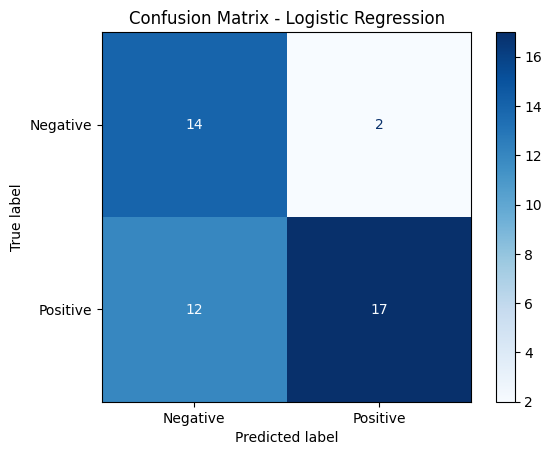

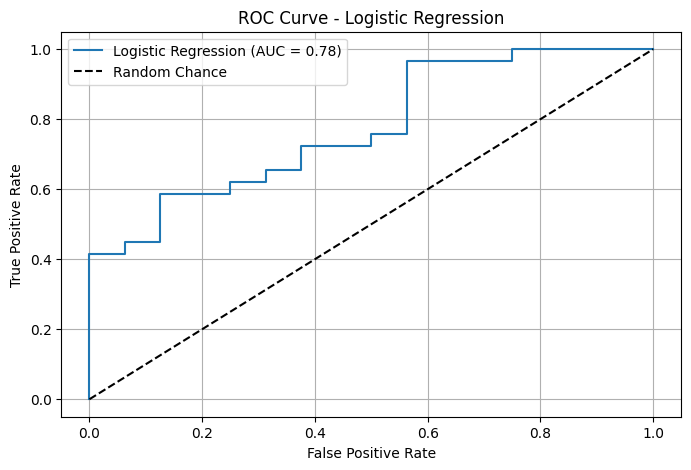

In [12]:
final_merged_df = pd.read_csv('project_checkin_data.csv')

# create features and target
X = final_merged_df[['GSPC_Return', 'change_in_followers']]
y = final_merged_df['TSLA_Positive_Return']

# drop missing values
X = X.dropna()
y = y.loc[X.index]

# split and Ttain
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# predictions
log_preds = log_model.predict(X_test)

# confusion matrix
log_conf_matrix = confusion_matrix(y_test, log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=log_conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# roc curve 
y_probs = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()
